# Text preprocessing: Bigrams, Stemming and Lemmatizing

* **Text Mining** is the process of deriving high-quality information from text.
* Text mining incorporates ideas from **Natural Language Processing** (NLP) 
* One common task in Text Mining is **tokenization**. 
  * "**Tokens**" are usually **individual words**
  * "**tokenization**" is breaking  a text up into its individual words.
* Token is the **atomic unit** of text comparison. 
  * If we want to `compare two documents`, we count how many tokens they share in common.

## 1. Exploring the `reuters` corpus

* A **text corpus** is a large  text collection
* The Reuters Corpus contains 10,788 **news** documents totaling 1.3 million words
  * The documents have been classified into **90 topics**, 
  * and grouped into **two sets**, called "training" and "test"

In [2]:
import nltk
from nltk.corpus import reuters

nltk.download('reuters')
reuters.readme().replace('\n', ' ')

[nltk_data] Downloading package reuters to /home/ignazio/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


'       The Reuters-21578 benchmark corpus, ApteMod version  This is a publically available version of the well-known Reuters-21578 "ApteMod" corpus for text categorization.  It has been used in publications like these:   * Yiming Yang and X. Liu. "A re-examination of text categorization    methods".  1999.  Proceedings of 22nd Annual International SIGIR.    http://citeseer.nj.nec.com/yang99reexamination.html   * Thorsten Joachims. "Text categorization with support vector    machines: learning with many relevant features".  1998. Proceedings    of ECML-98, 10th European Conference on Machine Learning.    http://citeseer.nj.nec.com/joachims98text.html  ApteMod is a collection of 10,788 documents from the Reuters financial newswire service, partitioned into a training set with 7769 documents and a test set with 3019 documents.  The total size of the corpus is about 43 MB.  It is also available for download from http://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html , which inclu

In [3]:
reuters.fileids() # the ids of the train set and test set

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [4]:
reuters.fileids()[-1]

'training/9995'

In [5]:
len(reuters.fileids())

10788

In [6]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [7]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [8]:
reuters.sents('test/14826')

[['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ...]

In [9]:
# we can specify the words we want in terms of files 
reuters.words('training/9865')[:6]

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS']

In [10]:
# we can specify the words we want in terms of categories 
reuters.words(categories='barley')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

## 2. n-grams

*  **n-gram** is a contiguous sequence of **n items** from a given sample of **text** or speech

* an n-gram of size 1 is referred to as a "**unigram**"
* size 2 is a "**bigram**"
* size 3 is a "**trigram**"
* etc.

**bigram example**

<img src="figures/Ngram-language-model.png" width="50%">

### Tokenization

In [11]:
trade_words = reuters.words(categories='trade')
len(trade_words)

142723

In [12]:
trade_words_condensed = trade_words[:100]
trade_words_condensed

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]

### Stopwords

* Text may contain stop words like  
  'the', 'is', 'are'...
* Stop words can be **filtered** from the text to be processed.

In [13]:
from nltk.corpus import stopwords

# Remove stopwords from trade_words_condensed and lower case it
trade_words_condensed = [w.lower() for w in trade_words_condensed if w.lower() not in stopwords.words('english')]
trade_words_condensed[:10]

['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 '.',
 '.-',
 'japan',
 'rift',
 'mounting']

### Punctuation

In [14]:
import string # Contains string constants eg. ascii_lowercase which is 'a...z', string formatting functions, other string functions like .capwords() and .translate().

# Remove punctuation
# trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation]
punct_combo = [c + "\"" for c in string.punctuation ] + ["\"" + c for c in string.punctuation] + [".-", ":-", "..", "..."]
trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation and w not in punct_combo]
trade_words_condensed

['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 'japan',
 'rift',
 'mounting',
 'trade',
 'friction',
 'u',
 'japan',
 'raised',
 'fears',
 'among',
 'many',
 'asia',
 'exporting',
 'nations',
 'row',
 'could',
 'inflict',
 'far',
 'reaching',
 'economic',
 'damage',
 'businessmen',
 'officials',
 'said',
 'told',
 'reuter',
 'correspondents',
 'asian',
 'capitals',
 'u',
 'move',
 'japan',
 'might',
 'boost',
 'protectionist',
 'sentiment',
 'u',
 'lead',
 'curbs',
 'american',
 'imports',
 'products',
 'exporters',
 'said',
 'conflict',
 'would',
 'hurt',
 'long']

### Bigrams

In [15]:
from nltk import bigrams

bi_trade_words_condensed = list(bigrams(trade_words_condensed))
bi_trade_words_condensed[:5]

[('asian', 'exporters'),
 ('exporters', 'fear'),
 ('fear', 'damage'),
 ('damage', 'u'),
 ('u', 'japan')]

### Frequency distributions

Count the number of times that each outcome of an experiment occurs.

In [16]:
from nltk import FreqDist

bi_fdist = FreqDist(bi_trade_words_condensed)

for word, frequency in bi_fdist.most_common(3):
    print(word, frequency)

('u', 'japan') 2
('asian', 'exporters') 1
('fears', 'among') 1


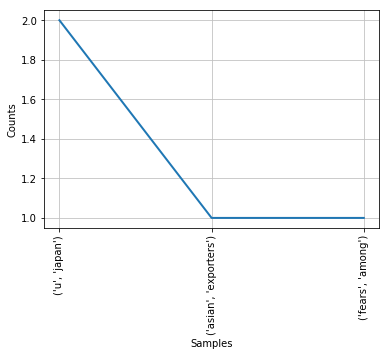

In [18]:
bi_fdist.plot(3, cumulative=False);

## 3. Stemming

* is the process of **reducing derived words** to their word stem, base or root form
* **Example**: strings such as `cats`, `catlike`, and `catty` have the same stem **cat**.
* Several types of stemming algorithms which differ in respect to **performance** and **accuracy**.
  * simple stemmer: **lookup table**
  * **Suffix-stripping** is a list of "rules": ex. if the word ends in '`ed`', remove the 'ed'
  * etc.

In [20]:
from nltk.stem import (PorterStemmer, LancasterStemmer)
from nltk.stem.snowball import SnowballStemmer # This is "Porter 2" and is considered the optimal stemmer.

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

print(porter.stem('Re-testing'), lancaster.stem('Re-testing'), snowball.stem('Re-testing'))

re-test re-testing re-test


In [21]:
# Fun fact: SnowballStemmer can stem several other languages beside English.
# To make, for instance, a French stemmer, we can do the following: french_stemmer = SnowballStemmer('french')
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [22]:
from nltk import word_tokenize

sentence = "So, we'll go no more a-roving. So late into the night, Though the heart be still as loving, And the moon be still as bright."

# This uses the 3-argument version of str.maketrans with arguments (x, y, z) where 'x' and 'y' must be equal-length strings and characters in 'x' are replaced by characters in 'y'. 'z' is a string (string.punctuation here) where each character in the string is mapped to None
translator = str.maketrans('', '', string.punctuation)
translator

# This is an alternative that creates a dictionary mapping of every character from string.punctuation to None (this will also work but creates a whole dictionary so is slower)
#translator = str.maketrans(dict.fromkeys(string.punctuation))

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [24]:
tokens = word_tokenize(sentence.translate(translator))
tokens[:3]

['So', 'well', 'go']

In [25]:
for stemmer in [porter, lancaster, snowball]:
    print([stemmer.stem(t) for t in tokens])

['So', 'well', 'go', 'no', 'more', 'arov', 'So', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']
['so', 'wel', 'go', 'no', 'mor', 'arov', 'so', 'lat', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'stil', 'as', 'lov', 'and', 'the', 'moon', 'be', 'stil', 'as', 'bright']
['so', 'well', 'go', 'no', 'more', 'arov', 'so', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']


## 4. Lemmatizing

* More complex approach than stemming. 
  * first determining the **part of speech** (noun, verb, adjective, etc.) of a word, 
  * then applying different **normalization rules** for each part of speech. 

* identifying the **wrong category** or being unable to produce the right category limits the added benefit of this approach 

In [27]:
# The default lemmatization method with the Python NLTK 
# is the WordNet lemmatizer.
nltk.download('wordnet')
from nltk import WordNetLemmatizer

wnl = WordNetLemmatizer()

print(wnl.lemmatize('brightening'), wnl.lemmatize('boxes'))

brightening box


[nltk_data] Downloading package wordnet to /home/ignazio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
# As we saw above, sometimes, if we try to lemmatize a word, 
# it will end up with the same word. 
# This is because the default part of speech is nouns.
wnl.lemmatize('brightening', pos='v')

'brighten'